In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("D:\ML\dataset\Linear Regression.xlsx")

In [3]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [6]:
df = dataset.drop(columns=['sqft_living','bedrooms','bathrooms'])

In [7]:
df.head()

,price,floors
0,221900,1.0
1,538000,2.0
2,180000,1.0
3,604000,1.0
4,510000,1.0


In [8]:
df.dtypes

price       int64
floors    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   21613 non-null  int64  
 1   floors  21613 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.0,450000.0,645000.0,7700000.0
floors,21613.0,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029602104A48>,
      dtype=object)

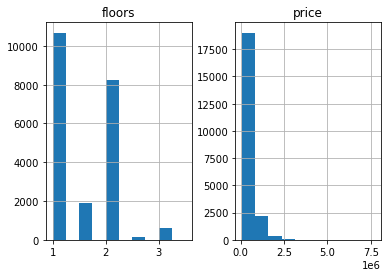

In [12]:
df.hist()

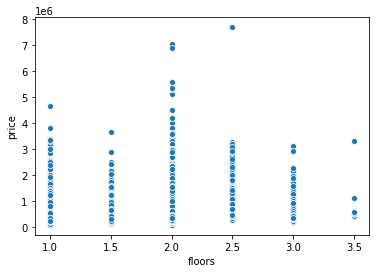

In [13]:
sns.scatterplot(df['floors'],df['price'])

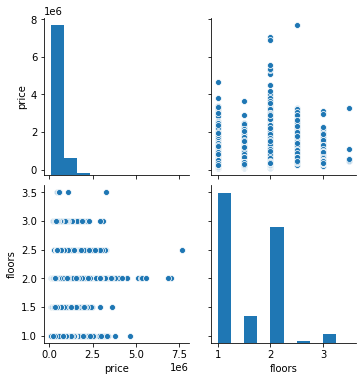

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,price,floors
price,1.000000,0.256794
floors,0.256794,1.000000


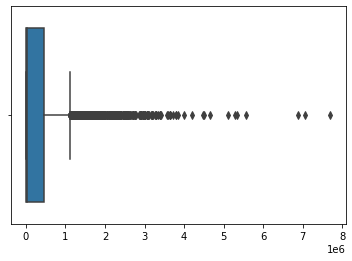

In [17]:
sns.boxplot(df)

## Indepedent and dependent Feature

In [18]:
X = df.iloc[:,1:]   # independt Feature
y = df.iloc[:,:-1]   # dependent Feature

In [19]:
X.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [20]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


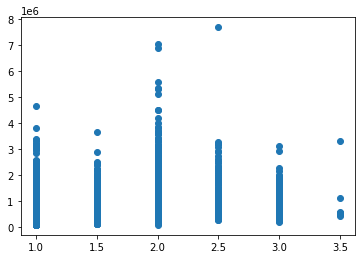

In [21]:
plt.scatter(X,y)
plt.show()

## Split training and testing data set 

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.25,random_state=0)

## Model Building

In [23]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

## Train the Model

In [24]:
linear.fit(X_train,y_train)

LinearRegression()

In [25]:
linear.coef_    # To Find the Slop M

array([[175800.02991468]])

In [26]:
linear.intercept_   # To find the constant C

array([275751.09206401])

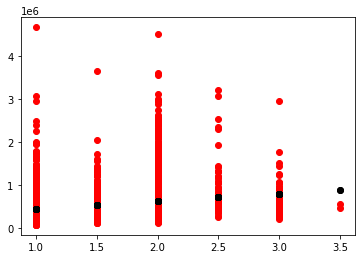

In [30]:
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_train,linear.predict(X_train),color='black')
plt.show()

## Test the Model

In [27]:
y_pred = linear.predict(X_test)

In [28]:
y_pred

array([[803151.18180806],
       [627351.15189337],
       [451551.12197869],
       ...,
       [627351.15189337],
       [627351.15189337],
       [451551.12197869]])

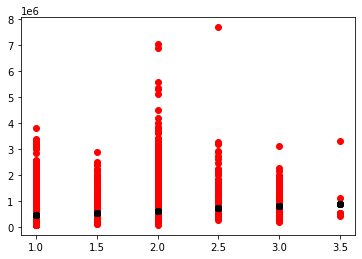

In [31]:
plt.scatter(X_test,y_test,color = 'red')
plt.scatter(X_test,linear.predict(X_test),color = 'black')
plt.show()

## Estimate Cost

In [32]:
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
r_square = r2_score(y_test,y_pred)
print("RMSE Values:",RMSE)
print("R^2 Values:",r_square)

RMSE Values: 360139.0733782412
R^2 Values: 0.06392686962199934


## unseen Predictor Values

In [37]:
unseen = linear.predict(np.array([[1.0]]))
print("The unseen Values:",unseen)

The unseen Values: [[451551.12197869]]


In [35]:
df.head()

,price,floors
0,221900,1.0
1,538000,2.0
2,180000,1.0
3,604000,1.0
4,510000,1.0
